In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Data Cleaning and Preprocessing

In [ ]:
shark_tank_data = pd.read_csv('Shark Tank India.csv')
shark_tank_data.shape

In [ ]:
shark_tank_data.head()

In [ ]:
shark_tank_data.describe()

In [ ]:
shark_tank_data.isnull().count()

In [ ]:
shark_tank_data.columns

In [ ]:
shark_tank_data['Season Number'].isnull().sum()

In [ ]:
shark_tank_data['Received Offer'].isnull().sum()

In [ ]:
shark_tank_data['Accepted Offer'].isnull().sum()

In [ ]:
shark_tank_data['Deal has conditions'].isnull().sum()

In [ ]:
shark_tank_data['Has Patents'].isnull().sum()

In [ ]:
shark_tank_data['Has Patents'] = shark_tank_data['Has Patents'].fillna(0)

In [ ]:
shark_tank_data['Pitchers City'].isnull().sum()

In [ ]:
shark_tank_data['Pitchers State'].isnull().sum()

In [ ]:
shark_tank_data = shark_tank_data.dropna(how='all')

In [ ]:
shark_tank_data = shark_tank_data.drop(['Season Start', 'Season End', 'Episode Number', 'Episode Title', 'Pitch Number', 'Company Website', 'Number of Presenters', 'Male Presenters',	'Female Presenters', 'Transgender Presenters', 'Couple Presenters', 'Started in', 'Guest Investment Amount(in lakhs)', 'Guest Investment Equity Percentage', 'Guest Debt Amount(in lakhs)', 'Guest Name'], axis=1)

In [ ]:
shark_tank_data.columns

In [ ]:
shark_tank_data['Startup Name'] = shark_tank_data['Startup Name'].str.strip()
shark_tank_data['Industry'] = shark_tank_data['Industry'].str.strip()
shark_tank_data['Business Description'] = shark_tank_data['Business Description'].str.strip()
shark_tank_data['Pitchers City'] = shark_tank_data['Pitchers City'].str.strip()
shark_tank_data['Pitchers State'] = shark_tank_data['Pitchers State'].str.strip()

EDA

In [256]:
shark_tank_data.columns

Index(['Season Number', 'Startup Name', 'Industry', 'Business Description',
       'Pitchers Average Age', 'Pitchers City', 'Pitchers State',
       'Yearly Revenue(in lakhs)', 'Monthly Sales(in lakhs)',
       'Gross Margin Percentage', 'Net Margin Percentage',
       'Original Ask Amount(in lakhs)', 'Original Offered Equity Percentage',
       'Valuation Requested(in lakhs)', 'Received Offer', 'Accepted Offer',
       'Total Deal Amount(in lakhs)', 'Total Deal Equity Percentage',
       'Total Deal Debt(in lakhs)', 'Debt Interest Percentage',
       'Deal Valuation(in lakhs)', 'Number of sharks in deal',
       'Deal has conditions', 'Has Patents',
       'Ashneer Investment Amount(in lakhs)',
       'Ashneer Investment Equity Percentage', 'Ashneer Debt Amount(in lakhs)',
       'Namita Investment Amount(in lakhs)',
       'Namita Investment Equity Percentage', 'Namita Debt Amount(in lakhs)',
       'Anupam Investment Amount(in lakhs)',
       'Anupam Investment Equity Percentage', '

In [ ]:
# deals per season

investments_per_season = shark_tank_data.groupby('Season Number')['Total Deal Amount(in lakhs)'].count()

investments_per_season_df = investments_per_season.reset_index()
investments_per_season_df.rename(columns={'Total Deal Amount(in lakhs)': 'no. of deals'}, inplace=True)

print(investments_per_season_df.to_string(index=False))

In [ ]:
shark_counts_df = shark_counts_df = pd.DataFrame({
    'Name': ['Ashneer', 'Namita', 'Anupam', 'Vineeta', 'Aman', 'Peyush', 'Ghazal', 'Amit'],
    'Count': [shark_tank_data['Ashneer Investment Amount(in lakhs)'].count(),
              shark_tank_data['Namita Investment Amount(in lakhs)'].count(),
              shark_tank_data['Anupam Investment Amount(in lakhs)'].count(),
              shark_tank_data['Vineeta Investment Amount(in lakhs)'].count(),
              shark_tank_data['Aman Investment Amount(in lakhs)'].count(),
              shark_tank_data['Peyush Investment Amount(in lakhs)'].count(),
              shark_tank_data['Ghazal Investment Amount(in lakhs)'].count(),
              shark_tank_data['Amit Investment Amount(in lakhs)'].count()
            ]
})

In [ ]:
# Display the total investment amount in each sector

total_investment_by_industry = shark_tank_data.groupby('Industry')['Total Deal Amount(in lakhs)'].sum()

print(total_investment_by_industry)

In [ ]:
# Success rate by Industry

shark_tank_data['Success'] = shark_tank_data['Monthly Sales(in lakhs)'] > 0

success_rate_by_industry = shark_tank_data.groupby('Industry')['Success'].mean() * 100

print(success_rate_by_industry)


In [ ]:
# popular and successful industries based on investment amounts and success rates.

investment_amount_by_industry = shark_tank_data.groupby('Industry')['Total Deal Amount(in lakhs)'].sum()

industry_analysis = pd.DataFrame({
    'Total Investment Amount (in lakhs)': investment_amount_by_industry,
    'Success Rate (%)': success_rate_by_industry
})

industry_analysis = industry_analysis.sort_values(by='Total Investment Amount (in lakhs)', ascending=False)

print(industry_analysis)


In [ ]:
# average and median funding by industry

grouped_by_industry = shark_tank_data.groupby('Industry')

funding_analysis = pd.DataFrame({
    'Average Funding Amount (in lakhs)': grouped_by_industry['Total Deal Amount(in lakhs)'].mean(),
    'Median Funding Amount (in lakhs)': grouped_by_industry['Total Deal Amount(in lakhs)'].median()
})

print(funding_analysis)


In [266]:
# Investment by State

state_investment = shark_tank_data.groupby('Pitchers State')['Total Deal Amount(in lakhs)'].sum()

Visualizations

In [227]:
print(plt.style.available)

plt.style.use('ggplot')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<Axes: title={'center': 'Investments per season'}, xlabel='Season', ylabel='No. of investments'>

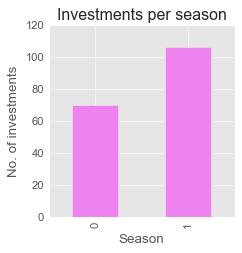

In [251]:
# deals per season

investments_per_season_df['no. of deals'].plot(kind="bar", figsize=(3,3), xlabel="Season", ylabel="No. of investments", title="Investments per season", color="violet")

<Axes: xlabel='Name'>

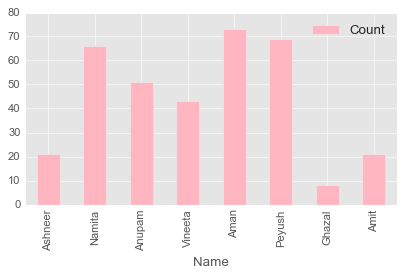

In [229]:
# Identify the most active investors by counting their investments across all seasons.

shark_counts_df.plot(kind="bar", x="Name", y="Count", color = "lightpink", figsize=[6,3])

<Axes: title={'center': 'Industrywise Investment in lakhs'}, xlabel='Investment(in lakhs)', ylabel='Industry'>

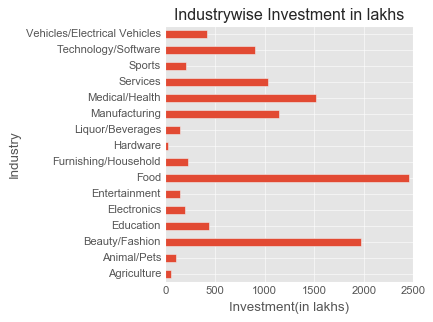

In [230]:
# Display the total investment amount in each sector.

total_investment_by_industry.plot(kind='barh', ylabel='Industry', xlabel='Investment(in lakhs)', title='Industrywise Investment in lakhs' , figsize=(4, 4),  legend=False)

<Axes: >

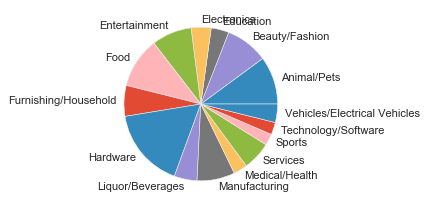

In [231]:
# success rate by industry

success_rate_by_industry.plot(kind='pie', figsize=[6,3],ylabel="", xlabel=None)

<Axes: xlabel='Industry', ylabel='Success Rate (%)'>

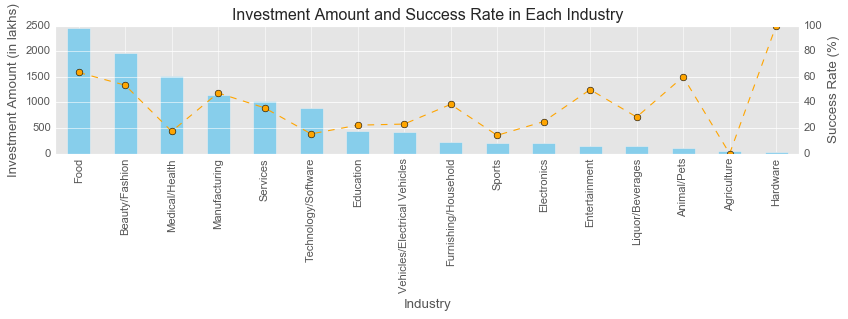

In [232]:
# popular and successful industries based on investment amounts and success rates.

ax1 = industry_analysis['Total Investment Amount (in lakhs)'].plot(kind="bar", color = "skyblue", figsize=[12,2], ylabel = 'Investment Amount (in lakhs)', title='Investment Amount and Success Rate in Each Industry')
ax2 = ax1.twinx()
industry_analysis['Success Rate (%)'].plot(ax = ax2 , kind="line", color='orange', marker='o', linestyle='dashed', ylabel = 'Success Rate (%)')

<Axes: ylabel='Industry'>

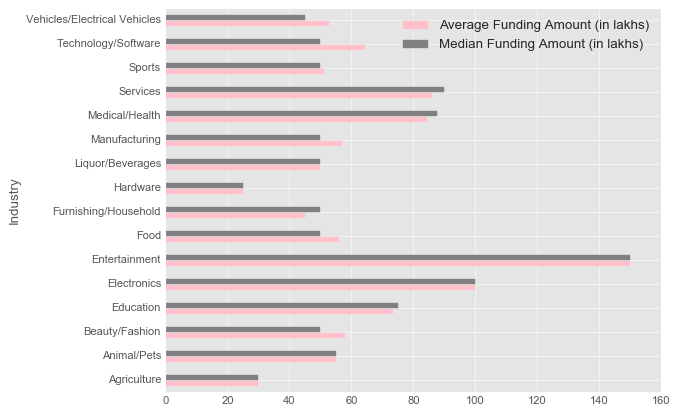

In [234]:
# average and median funding by industry

funding_analysis.plot(kind="barh", color=["pink", "gray"])

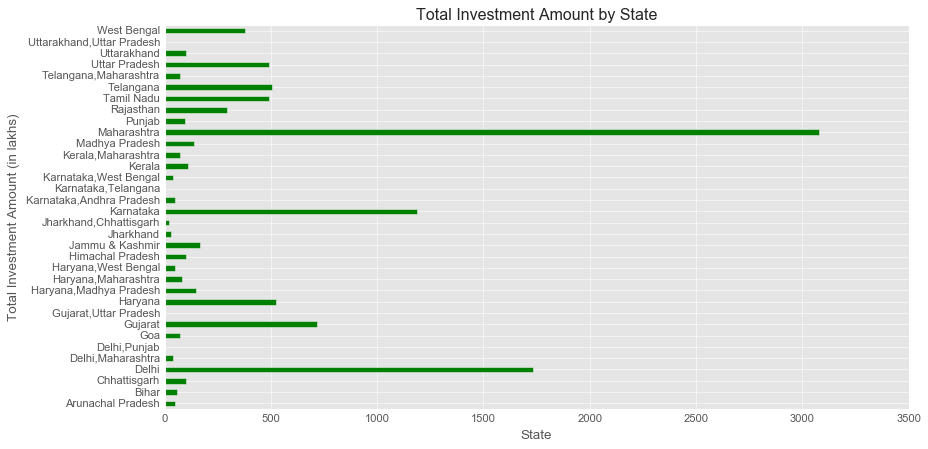

In [267]:
# investment by state

plt.figure(figsize=(12, 6))
state_investment.plot(kind='barh', color='green')
plt.xlabel('State')
plt.ylabel('Total Investment Amount (in lakhs)')
plt.title('Total Investment Amount by State')
plt.show()